In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
pip install mendeleev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.1/353.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.8/865.8 kB 28.7 MB/s eta 0:00:00


In [3]:
pip install bilby

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.0 MB/s eta 0:00:00


In [4]:
pip install pymultinest==2.11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.7 MB/s eta 0:00:00


In [5]:
pip install juliet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.8/394.8 kB 10.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
import math
import sys
import numpy as np
import pandas as pd
from numpy import linspace, arange, zeros
from matplotlib.pylab import plt
from mendeleev import element
from bilby import result
import bilby
import seaborn as sns

In [7]:
label = 'ldm'
outdir = 'outdir'
bilby.utils.check_directory_exists_and_if_not_mkdir(outdir)

In [8]:
Z, N, BE_EXP = np.loadtxt('audibe-in_modified.dat',usecols=(0,1,2), unpack= True)
A = Z + N
az = np.vstack((A,Z))
x = az

data = -BE_EXP
ndata = len(data)
P = open('results.out','w')
print('ndata=',ndata, file=P)

In [9]:
def model(az,a_v,a_s,a_a,a_c,a_p):
    a=az[0,:]
    z=az[1,:]
    a13 = pow(a,0.3333)
    zz1 = z*z
    nz = a -2*z
    nz2 = pow(nz , 2.0)
    i=0

    x=0

    if(((Z[i]%2)==0).any()):
      if(((N[i]%2)==0).any()):
        x=1
        i+=1
    if(((N[i]%2)==0).any()):
      if(((Z[i]%2)==0).any()):
        x=1
        i+=1



    if(((Z[i]%2)!=0).any()):
      if(((N[i]%2)!=0).any()):
        x=(-1)
        i+=1

    if(((N[i]%2)!=0).any()):
      if(((Z[i]%2)!=0).any()):
        x=(-1)
        i+=1
    else:
      x=0


    BE=  a_v*a + a_s*a**(2.0/3.0)+ a_c*zz1/a13 + a_a*(nz2/a)-a_p*a**(-0.75)*x
    return BE

In [10]:
print(N)

[  1.   1.   1. ... 177. 176. 177.]


In [11]:
print(Z)

[  0.   1.   1. ... 117. 118. 118.]


In [12]:
'''if((Z%2)==0):
      if((N%2)==0):
        a_p==34
    if((N%2)==0):
      if((Z%2)==0):
        a_p==34



    if((Z%2)!=0):
      if((N%2)!=0):
        a_p== -34

    if((N%2)!=0):
      if((Z%2)!=0):
        a_p== -34
    else:
      a_p== 0



      if(((Z%2)==0and(N%2)==0).all()):

      a_p==34
    if(((Z%2)!=0 or(N%2)!=0).all()):

      a_p==0
    else:
      a_p==-34 '''

'if((Z%2)==0):\n      if((N%2)==0):\n        a_p==34\n    if((N%2)==0):\n      if((Z%2)==0):\n        a_p==34\n\n\n\n    if((Z%2)!=0):\n      if((N%2)!=0):\n        a_p== -34\n\n    if((N%2)!=0):\n      if((Z%2)!=0):\n        a_p== -34\n    else:\n      a_p== 0\n\n\n\n      if(((Z%2)==0and(N%2)==0).all()):\n\n      a_p==34\n    if(((Z%2)!=0 or(N%2)!=0).all()):\n\n      a_p==0\n    else:\n      a_p==-34 '

In [13]:
injection_parameters = dict(a_v=-14, a_s=18, a_a=23, a_c=0.7, a_p=34)
n = len(Z)
#sigma = np.random.normal(1, 0.01, n)
sigma = 3.075

In [14]:
likelihood = bilby.likelihood.GaussianLikelihood(az, data, model,
sigma)

In [15]:
priors = dict()
priors['a_v'] = bilby.core.prior.Uniform(-30,-10 , '$a_v$',unit='MeV')
priors['a_s'] = bilby.core.prior.Uniform(0,25, '$a_s$',unit='MeV')
priors['a_a'] = bilby.core.prior.Uniform(15, 50, '$a_a$',unit='MeV')
priors['a_c'] = bilby.core.prior.Uniform(1,5,'$a_c$',unit='MeV')
#priors['a_p'] = bilby.core.prior.Normal(20,34,'$a_p$', unit='MeV' )
priors['a_p'] = bilby.core.prior.Normal(34,5,'$a_p$', unit='MeV' )

In [16]:
result = bilby.run_sampler(
    likelihood=likelihood, priors=priors, sampler='dynesty', nlive=500,
    sample='unif', injection_parameters=injection_parameters, outdir=outdir,
    label=label)
result.plot_corner(priors=True,label_kwargs={"fontsize": 25},title_kwargs=dict(fontsize=20),max_n_ticks=3,smooth=1.0)
result.plot_marginals()
print( result.log_evidence, result.log_evidence_err,
            np.log(result.occam_factor(priors)))

08:30 bilby INFO    : Running for label 'ldm', output will be saved to 'outdir'
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
08:30 bilby INFO    : Analysis priors:
08:30 bilby INFO    : a_v=Uniform(minimum=-30, maximum=-10, name='$a_v$', latex_label='$a_v$', unit='MeV', boundary=None)
08:30 bilby INFO    : a_s=Uniform(minimum=0, maximum=25, name='$a_s$', latex_label='$a_s$', unit='MeV', boundary=None)
08:30 bilby INFO    : a_a=Uniform(minimum=15, maximum=50, name='$a_a$', latex_label='$a_a$', unit='MeV', boundary=None)
08:30 bilby INFO    : a_c=Uniform(minimum=1, maximum=5, name='$a_c$', latex_label='$a_c$', unit='MeV', boundary=None)
08:30 bilby INFO    : a_p=Normal(mu=34, sigma=5, name='$a_p$', latex_label='$a_p$', unit='MeV', boundary=None)
08:30 bilby INFO    : Analysis likelihood class: <class 'bilby.core.likelihood.GaussianLikelihood'>
08:30 bilby INFO 

1it [00:00, ?it/s]

08:33 bilby INFO    : Written checkpoint file outdir/ldm_resume.pickle
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImpo

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

-99227.68938640249 0.34845097856302437 -inf


<ipython-input-16-1ca3e35613c3>:8: RuntimeWarning: divide by zero encountered in log
  np.log(result.occam_factor(priors)))


In [17]:
av_fit=result.get_one_dimensional_median_and_error_bar('a_v')
av1 = av_fit.median
as_fit=result.get_one_dimensional_median_and_error_bar('a_s')
as1 = as_fit.median
aa_fit=result.get_one_dimensional_median_and_error_bar('a_a')
aa1 = aa_fit.median
ac_fit=result.get_one_dimensional_median_and_error_bar('a_c')
ac1 = ac_fit.median
ap_fit=result.get_one_dimensional_median_and_error_bar('a_p')
ap1 = ap_fit.median
print(av1,as1,aa1,ac1,ap1)
data_fit = model(az,av1,as1,aa1,ac1,ap1)


-18.878902910894553 24.999961531534158 30.28462037006198 1.0000006322097625 34.00719286725492


In [18]:
cov_mat = result.covariance_matrix
nrow,ncol=np.shape(cov_mat)
print('row and columns',nrow,ncol)
corr=np.empty((nrow,ncol))
for i in range(0,nrow):
    for j in range(0,ncol):
        corr[i][j]=cov_mat[i][j] /np.sqrt(cov_mat[i][i]*cov_mat[j][j])
#output=open('results.out','w')
np.set_printoptions(precision=3)
#print(corr,file=output)
#print('Correlationmatrix',file=P)
#print(corr,file=P)
#utput.close()
print(corr)

row and columns 5 5
[[ 1.    -0.021 -0.903  0.027  0.004]
 [-0.021  1.    -0.001  0.003  0.009]
 [-0.903 -0.001  1.    -0.016  0.014]
 [ 0.027  0.003 -0.016  1.    -0.012]
 [ 0.004  0.009  0.014 -0.012  1.   ]]


In [19]:
print(corr)

[[ 1.    -0.021 -0.903  0.027  0.004]
 [-0.021  1.    -0.001  0.003  0.009]
 [-0.903 -0.001  1.    -0.016  0.014]
 [ 0.027  0.003 -0.016  1.    -0.012]
 [ 0.004  0.009  0.014 -0.012  1.   ]]


<Axes: >

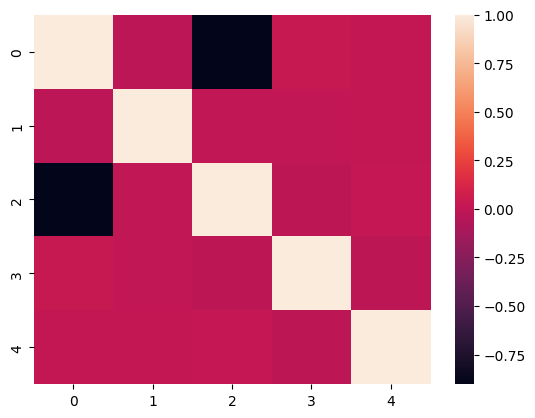

In [20]:
sns.heatmap(corr)

In [21]:
print('Parameters', file =P)
data1 = { 'av':[av_fit.median], 'plus':[av_fit.plus], 'minus':[av_fit.minus]}
data2 = { 'as':[as_fit.median], 'plus':[as_fit.plus], 'minus':[as_fit.minus]}
data3 = { 'aa':[aa_fit.median], 'plus':[aa_fit.plus], 'minus':[aa_fit.minus]}
data4 = { 'ac':[ac_fit.median], 'plus':[ac_fit.plus], 'minus':[ac_fit.minus]}
data5 = { 'ap':[ap_fit.median], 'plus':[ap_fit.plus], 'minus':[ap_fit.minus]}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)
df5 = pd.DataFrame(data5)
print(df1.to_string(index=False),file=P)
print(df2.to_string(index=False),file=P)
print(df3.to_string(index=False),file=P)
print(df4.to_string(index=False),file=P)
print(df5.to_string(index=False),file=P)

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [22]:
H=open('fit.out','w')

data6={'Z':Z, 'N':N, 'BE_EXP':BE_EXP, 'BE_FIT':data_fit}
df=pd.DataFrame(data6)
print(df.to_string(index=False),file=H)
H.close()

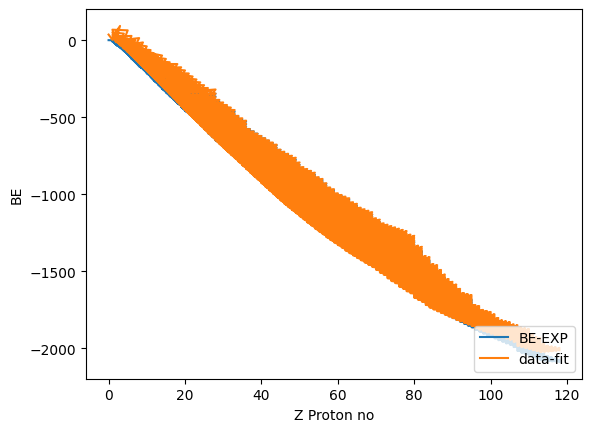

In [23]:

plt.plot(Z,-BE_EXP )
plt.plot(Z, data_fit)


plt.xlabel('Z Proton no')

plt.ylabel('BE')


plt.legend(["BE-EXP", "data-fit"], loc ="lower right")

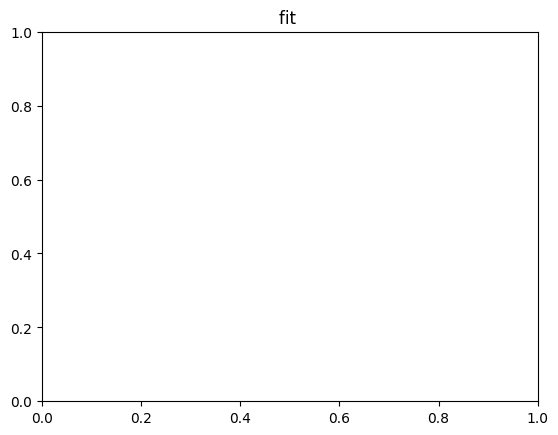

In [24]:
# giving a title to my graph
plt.title('fit ')

# function to show the plot

plt.savefig('fit.png') #.format(outdir, label))

In [25]:
plt.show()
chisq = np.sum(((data-data_fit)/sigma)**2.0)
#J = open('chi.out','w')
data5={'Chi2=':[chisq]}
df5 = pd.DataFrame(data5)
print(df5.to_string(index=False),file=P)
#J.close()

P.close()
print ('chisq',chisq)

chisq 183835.40784960752


In [ ]:
df2=pd.read_csv("/content/audibe-in.csv")

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
df2


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


,0,1,0.1
0,1,1,1.000000
1,1,1,2.224566
2,1,2,8.481796
3,2,1,7.718041
4,3,0,-6.801000
...,...,...,...
3552,117,176,2078.835000
3553,118,175,2073.854000
3554,117,177,2085.048000
3555,118,176,2081.226000


In [ ]:
df4=df.query('Z%2==0 & N%2==0')['N']
print(df3)

          aa      plus     minus
0  30.284737  0.017697  0.019157


In [ ]:
df4=df.query('Z%2==0 & N%2==0')['Z']
print(df4)

7         2.0
14        2.0
16        4.0
23        2.0
25        4.0
        ...  
3535    114.0
3542    114.0
3544    116.0
3550    116.0
3556    118.0
Name: Z, Length: 886, dtype: float64


In [ ]:
df_concat = pd.concat([df4, df3], axis=1)

In [ ]:
print(df_concat)

          Z         aa      plus     minus
7       2.0        NaN       NaN       NaN
14      2.0        NaN       NaN       NaN
16      4.0        NaN       NaN       NaN
23      2.0        NaN       NaN       NaN
25      4.0        NaN       NaN       NaN
...     ...        ...       ...       ...
3542  114.0        NaN       NaN       NaN
3544  116.0        NaN       NaN       NaN
3550  116.0        NaN       NaN       NaN
3556  118.0        NaN       NaN       NaN
0       NaN  30.284737  0.017697  0.019157

[887 rows x 4 columns]


In [ ]:
df.isna().sum()

Z         0
N         0
BE_EXP    0
BE_FIT    0
dtype: int64

In [ ]:
dff=pd.read_csv("/content/audibe-in_modified.dat")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dff

,0\t1\t0
0,1\t1\t1
1,1\t1\t2.2245662
2,1\t2\t8.4817962
3,2\t1\t7.71804132
4,3\t0\t-6.801
...,...
3552,117\t176\t2078.835
3553,118\t175\t2073.854
3554,117\t177\t2085.048
3555,118\t176\t2081.226


In [ ]:
dff.columns = dff.columns.str.strip()

In [26]:
Z1, N1, BE_EXP1 = np.loadtxt('same_Z1.dat',usecols=(0,1,2), unpack= True)
A1 = Z1 + N1
az1 = np.vstack((A1,Z1))
x1 = az1

data1 = -BE_EXP1
ndata1 = len(data1)
P1 = open('results.out','w')
print('ndata=',ndata1, file=P1)

In [27]:
arrZ1=np.array([Z1])

In [28]:
print(Z1)

[  1.   1.   1. ... 117. 117. 118.]


In [29]:
arrN1=np.array([N1])

In [30]:
print(N1)

[  1.   2.   3. ... 175. 176. 176.]


In [31]:
print(BE_EXP1)

[2.016 3.929 0.7   ... 0.436 0.441 0.589]


In [32]:
k=list(zip(*zip(*zip(Z1, N1, BE_EXP1))))

In [33]:
print(k)

[(1.0, 1.0, 2.0163319), (1.0, 2.0, 3.9286149), (1.0, 3.0, 0.6999997), (1.0, 4.0, 0.3559793), (1.0, 5.0, 0.861061), (2.0, 2.0, 10.65631049), (2.0, 3.0, 1.2227284), (2.0, 4.0, 1.06008585), (2.0, 5.0, 1.4722391), (2.0, 6.0, 1.8947947), (2.0, 7.0, 0.532412), (3.0, 1.0, 5.14979005), (3.0, 2.0, 8.0261483), (3.0, 3.0, 0.7938844), (3.0, 4.0, 2.6092375), (3.0, 5.0, 1.0147994), (3.0, 6.0, 2.0443109), (3.0, 7.0, 0.2110456), (3.0, 8.0, 0.3028433), (3.0, 9.0, 0.1550001), (4.0, 2.0, 8.07806635), (4.0, 3.0, 4.1106449), (4.0, 4.0, 8.6170525), (4.0, 5.0, 2.5738717), (4.0, 6.0, 3.15532305), (4.0, 7.0, 1.3345446), (4.0, 8.0, 1.84036315), (4.0, 9.0, 1.1429482), (4.0, 10.0, 1.78794785), (4.0, 11.0, 1.1249999), (5.0, 2.0, 7.4433181), (5.0, 3.0, 2.8750493), (5.0, 4.0, 5.0696038), (5.0, 5.0, 1.5085135), (5.0, 6.0, 4.0422956), (5.0, 7.0, 0.75456935), (5.0, 8.0, 1.9545943), (5.0, 9.0, 0.9040232), (5.0, 10.0, 1.4303133), (5.0, 11.0, 0.77484795), (5.0, 12.0, 0.7358475), (5.0, 13.0, 0.04935335), (5.0, 14.0, 0.8268

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [34]:
k[3][2]

0.3559793

In [35]:
print(list(zip(Z1, N1, BE_EXP1)))

[(1.0, 1.0, 2.0163319), (1.0, 2.0, 3.9286149), (1.0, 3.0, 0.6999997), (1.0, 4.0, 0.3559793), (1.0, 5.0, 0.861061), (2.0, 2.0, 10.65631049), (2.0, 3.0, 1.2227284), (2.0, 4.0, 1.06008585), (2.0, 5.0, 1.4722391), (2.0, 6.0, 1.8947947), (2.0, 7.0, 0.532412), (3.0, 1.0, 5.14979005), (3.0, 2.0, 8.0261483), (3.0, 3.0, 0.7938844), (3.0, 4.0, 2.6092375), (3.0, 5.0, 1.0147994), (3.0, 6.0, 2.0443109), (3.0, 7.0, 0.2110456), (3.0, 8.0, 0.3028433), (3.0, 9.0, 0.1550001), (4.0, 2.0, 8.07806635), (4.0, 3.0, 4.1106449), (4.0, 4.0, 8.6170525), (4.0, 5.0, 2.5738717), (4.0, 6.0, 3.15532305), (4.0, 7.0, 1.3345446), (4.0, 8.0, 1.84036315), (4.0, 9.0, 1.1429482), (4.0, 10.0, 1.78794785), (4.0, 11.0, 1.1249999), (5.0, 2.0, 7.4433181), (5.0, 3.0, 2.8750493), (5.0, 4.0, 5.0696038), (5.0, 5.0, 1.5085135), (5.0, 6.0, 4.0422956), (5.0, 7.0, 0.75456935), (5.0, 8.0, 1.9545943), (5.0, 9.0, 0.9040232), (5.0, 10.0, 1.4303133), (5.0, 11.0, 0.77484795), (5.0, 12.0, 0.7358475), (5.0, 13.0, 0.04935335), (5.0, 14.0, 0.8268

In [36]:
arrZ=np.arange(1,119)

In [37]:
print(arrZ)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118]


In [38]:
len(arrZ)

118

In [39]:
arrN=np.arange(1,178)


In [40]:
print(arrN)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]


In [41]:
finallist=[]

In [ ]:
i=0
j=0
k=0
#arrz=[1   2   3   4   5   6   7   8   9]
#arrN=[1,2,....177]
#z1=first column of table
for i in range(len(Z1)+1):
  for j in range(len(arrZ)+1):
    for k in range (len(N1)+1):
      if Z1[i]==arrZ[j]:
        N1[k]
        N1[k]+1
        N1[k]-1




  for element in arrZ:
    for element in arrN:
      if Z1[i]==arrZ[i]
      if N1[i]==arrN[j]




      finallist.append(BE_EXP1[i-1])

      finallist.append(BE_EXP1[i])

      finallist.append(BE_EXP1[i+1])












SyntaxError: ignored

In [ ]:
graph = {
  'Z1' : ['N1','BE_EXP1'],

}

visited = set()

def dfs(visited, graph, node):
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)


print("Following is the Depth-First Search")
dfs(visited, graph, 'Z1')

Following is the Depth-First Search
Z1
N1


KeyError: ignored

In [ ]:
def create adjacency matrix():



In [ ]:
print(finallist)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [42]:
i=0
def caldelta(finallist):
  for i in range(len(finallist)):
    BE_EXP1_it=finallist[i+1]
    BE_EXP1_minus=finallist[i]
    BE_EXP1_add=finallist[i+2]


  delta = 0.5*BE_EXP1_add+0.5*BE_EXP1_minus+0.5*arrZ[i]*BE_EXP1_it
  return delta


In [ ]:
def sameZ(argument):


  for (Z in range(118)):

    match argument:



        case Z:
            return k[Z][2]
            Z++
        case 1:
            return BE2
        case 2:
            return BE3
        case default:
            return "0"


    argument = k[0][0]
    sameZ(argument)

SyntaxError: ignored

In [43]:

import pandas as pd



data = {'Z1': Z1, 'N1': N1, 'BE_EXP1': BE_EXP1}
df = pd.DataFrame(data)

In [44]:
df

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


,Z1,N1,BE_EXP1
0,1.0,1.0,2.016332
1,1.0,2.0,3.928615
2,1.0,3.0,0.700000
3,1.0,4.0,0.355979
4,1.0,5.0,0.861061
...,...,...,...
3316,116.0,175.0,0.580000
3317,116.0,176.0,0.732500
3318,117.0,175.0,0.436500
3319,117.0,176.0,0.441000


In [45]:
def calcdelta(dataframe,N1):
  dataframe

In [46]:
import pandas as pd


data = {'Z1': Z1, 'N1': N1, 'BE_EXP1': BE_EXP1}
df = pd.DataFrame(data)


In [47]:
df

,Z1,N1,BE_EXP1
0,1.0,1.0,2.016332
1,1.0,2.0,3.928615
2,1.0,3.0,0.700000
3,1.0,4.0,0.355979
4,1.0,5.0,0.861061
...,...,...,...
3316,116.0,175.0,0.580000
3317,116.0,176.0,0.732500
3318,117.0,175.0,0.436500
3319,117.0,176.0,0.441000


In [48]:
def calcdelta(dataframe, N1, Z1):
    try:
        a = dataframe['BE_EXP1'][(dataframe['Z1'] == Z1) & (dataframe['N1'] == N1 - 1)].values[0]
        b = dataframe['BE_EXP1'][(dataframe['Z1'] == Z1) & (dataframe['N1'] == N1 + 1)].values[0]
        c = dataframe['BE_EXP1'][(dataframe['Z1'] == Z1) & (dataframe['N1'] == N1)].values[0]
        return 0.5 * (a + b - 2 * c)
    except:
        return 0

In [ ]:
def calcdelta(dataframe,N1, Z1):
  try:
    a=dataframe['BE_EXP1'][dataframe['Z1']==Z1][dataframe['N1']==N1-1].values[0]
    b=dataframe['BE_EXP1'][dataframe['Z1']==Z1][dataframe['N1']==N1+1].values[0]
    c=dataframe['BE_EXP1'][dataframe['Z1']==Z1][dataframe['N1']==N1].values[0]
    return 0.5*(a+b+(Z1)*c)
  Except:
    return 0


SyntaxError: ignored

In [49]:
calcdelta(df,3.0,1.0)

1.4422974

In [50]:
ans=[]
ans1=[]
ans2=[]

for i in range(0,len(df)-1):
  if df.iloc[i]['N1']==1 or df.iloc[i]['N1']==max(N1) or calcdelta(df,df.iloc[i]['N1'],df.iloc[i]['Z1'])==0:
    continue

  ans.append(calcdelta(df,df.iloc[i]['N1'],df.iloc[i]['Z1']))
  ans1.append(df.iloc[i]['N1'])
  ans2.append(df.iloc[i]['Z1']+df.iloc[i]['N1'])

print(ans)

[-2.5704491, 1.4422974, 0.42455105000000004, 4.635469769999999, 0.28739789999999976, 0.00520117500000028, -0.8924691500000002, -5.054311074999999, 4.5238084999999995, -1.7048956, 1.3119748, -1.4313884000000001, 0.9625315000000001, -0.11982044999999997, 4.236914525, -5.2747942, 3.3123160749999996, -1.2011148999999997, 1.1632984999999998, -0.6016167499999998, 0.6712073000000001, -0.6539737999999999, 3.38141165, -2.8778224000000003, 3.0474362, -2.910754175, 2.2438756, -1.1252980249999998, 0.7884306, -0.5908777249999999, 0.3082324500000001, -0.32374685000000003, 0.7319969000000001, -0.63967685, -0.9167308000000007, 2.68429635, -4.679641800000001, 3.5681309249999993, -1.9135863999999998, 1.1026497750000002, -0.13772305000000018, 0.05578520000000009, -0.33979250000000016, 0.4634916499999999, -0.8808336499999999, 1.3224485, 1.7468271999999998, -3.44402965, 4.3237852000000006, -3.2531712500000003, 1.15219285, -0.054384074999999976, 0.3060174000000002, -0.347370975, 0.3362440000000002, -0.52821

In [51]:
df.iloc[3]['Z1']

1.0

In [52]:
len(ans)

3086

In [53]:
len(df)

3321

In [54]:
ans1

[2.0,
 3.0,
 4.0,
 3.0,
 4.0,
 5.0,
 6.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.

In [55]:
import matplotlib.pyplot as plt

In [56]:
ans

[-2.5704491,
 1.4422974,
 0.42455105000000004,
 4.635469769999999,
 0.28739789999999976,
 0.00520117500000028,
 -0.8924691500000002,
 -5.054311074999999,
 4.5238084999999995,
 -1.7048956,
 1.3119748,
 -1.4313884000000001,
 0.9625315000000001,
 -0.11982044999999997,
 4.236914525,
 -5.2747942,
 3.3123160749999996,
 -1.2011148999999997,
 1.1632984999999998,
 -0.6016167499999998,
 0.6712073000000001,
 -0.6539737999999999,
 3.38141165,
 -2.8778224000000003,
 3.0474362,
 -2.910754175,
 2.2438756,
 -1.1252980249999998,
 0.7884306,
 -0.5908777249999999,
 0.3082324500000001,
 -0.32374685000000003,
 0.7319969000000001,
 -0.63967685,
 -0.9167308000000007,
 2.68429635,
 -4.679641800000001,
 3.5681309249999993,
 -1.9135863999999998,
 1.1026497750000002,
 -0.13772305000000018,
 0.05578520000000009,
 -0.33979250000000016,
 0.4634916499999999,
 -0.8808336499999999,
 1.3224485,
 1.7468271999999998,
 -3.44402965,
 4.3237852000000006,
 -3.2531712500000003,
 1.15219285,
 -0.054384074999999976,
 0.30601740

In [57]:
def curve(x):
  return 4.66*(x**(-0.31))

In [58]:
ans3=[curve(i) for i in ans2]

In [59]:
ans3

[3.3149602700049,
 3.032126523179705,
 2.829470793153494,
 2.829470793153494,
 2.673985383948207,
 2.54920947659827,
 2.445839872841747,
 2.829470793153494,
 2.673985383948207,
 2.54920947659827,
 2.445839872841747,
 2.3581462643156565,
 2.2823692982569592,
 2.215920546046441,
 2.54920947659827,
 2.445839872841747,
 2.3581462643156565,
 2.2823692982569592,
 2.215920546046441,
 2.156948274242235,
 2.1040859553084577,
 2.0562988168289444,
 2.445839872841747,
 2.3581462643156565,
 2.2823692982569592,
 2.215920546046441,
 2.156948274242235,
 2.1040859553084577,
 2.0562988168289444,
 2.012786108249589,
 1.9729165778046882,
 1.9361845533993547,
 1.9021792511506663,
 1.8705628307572273,
 2.2823692982569592,
 2.215920546046441,
 2.156948274242235,
 2.1040859553084577,
 2.0562988168289444,
 2.012786108249589,
 1.9729165778046882,
 1.9361845533993547,
 1.9021792511506663,
 1.8705628307572273,
 1.8410543859405637,
 1.8134180546873933,
 2.156948274242235,
 2.1040859553084577,
 2.0562988168289444,


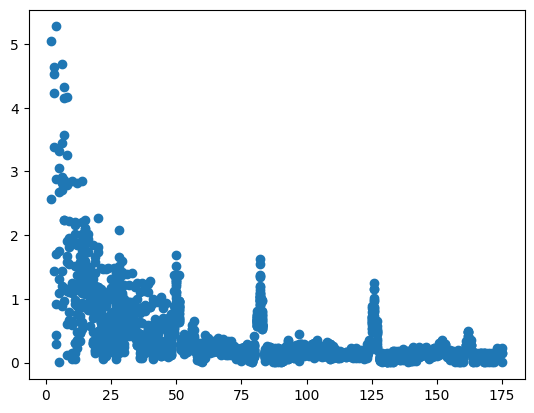

In [62]:
fig, ax = plt.subplots()


ax.scatter(ans1, abs_list)

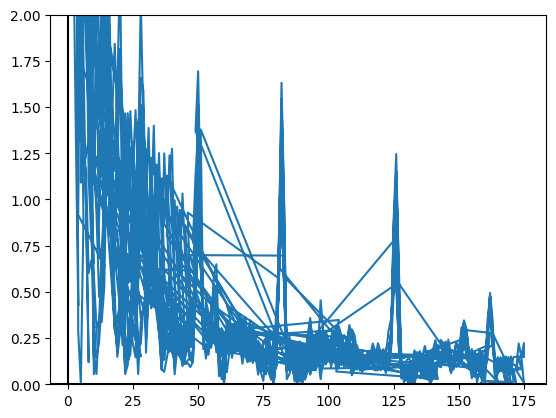

In [63]:
plt.plot(ans1, abs_list)
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.ylim(0, 2)
plt.show()

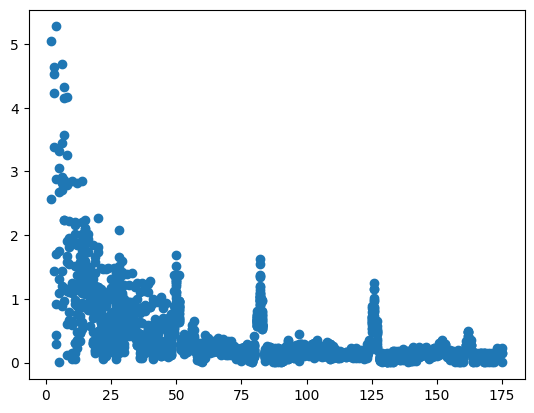

In [64]:
fig, ax = plt.subplots()


ax.scatter(ans1, abs_list)

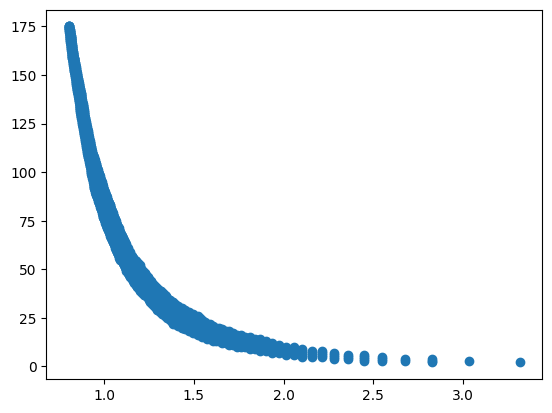

In [65]:
fig, ax = plt.subplots()

ax.scatter(ans3, ans1)

In [66]:
label = 'ldm'
outdir1 = 'outdir1'
bilby.utils.check_directory_exists_and_if_not_mkdir(outdir1)

In [67]:
ans

[-2.5704491,
 1.4422974,
 0.42455105000000004,
 4.635469769999999,
 0.28739789999999976,
 0.00520117500000028,
 -0.8924691500000002,
 -5.054311074999999,
 4.5238084999999995,
 -1.7048956,
 1.3119748,
 -1.4313884000000001,
 0.9625315000000001,
 -0.11982044999999997,
 4.236914525,
 -5.2747942,
 3.3123160749999996,
 -1.2011148999999997,
 1.1632984999999998,
 -0.6016167499999998,
 0.6712073000000001,
 -0.6539737999999999,
 3.38141165,
 -2.8778224000000003,
 3.0474362,
 -2.910754175,
 2.2438756,
 -1.1252980249999998,
 0.7884306,
 -0.5908777249999999,
 0.3082324500000001,
 -0.32374685000000003,
 0.7319969000000001,
 -0.63967685,
 -0.9167308000000007,
 2.68429635,
 -4.679641800000001,
 3.5681309249999993,
 -1.9135863999999998,
 1.1026497750000002,
 -0.13772305000000018,
 0.05578520000000009,
 -0.33979250000000016,
 0.4634916499999999,
 -0.8808336499999999,
 1.3224485,
 1.7468271999999998,
 -3.44402965,
 4.3237852000000006,
 -3.2531712500000003,
 1.15219285,
 -0.054384074999999976,
 0.30601740

In [68]:
abs_list = list()
for value in ans:
    absolute = abs(value)
    abs_list.append(absolute)

print(abs_list)

[2.5704491, 1.4422974, 0.42455105000000004, 4.635469769999999, 0.28739789999999976, 0.00520117500000028, 0.8924691500000002, 5.054311074999999, 4.5238084999999995, 1.7048956, 1.3119748, 1.4313884000000001, 0.9625315000000001, 0.11982044999999997, 4.236914525, 5.2747942, 3.3123160749999996, 1.2011148999999997, 1.1632984999999998, 0.6016167499999998, 0.6712073000000001, 0.6539737999999999, 3.38141165, 2.8778224000000003, 3.0474362, 2.910754175, 2.2438756, 1.1252980249999998, 0.7884306, 0.5908777249999999, 0.3082324500000001, 0.32374685000000003, 0.7319969000000001, 0.63967685, 0.9167308000000007, 2.68429635, 4.679641800000001, 3.5681309249999993, 1.9135863999999998, 1.1026497750000002, 0.13772305000000018, 0.05578520000000009, 0.33979250000000016, 0.4634916499999999, 0.8808336499999999, 1.3224485, 1.7468271999999998, 3.44402965, 4.3237852000000006, 3.2531712500000003, 1.15219285, 0.054384074999999976, 0.3060174000000002, 0.347370975, 0.3362440000000002, 0.528212675, 1.2960232, 1.94314567

In [69]:
ans2

[3.0,
 4.0,
 5.0,
 5.0,
 6.0,
 7.0,
 8.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 23.0,
 24.0,
 25.0,
 26.0,
 2

In [70]:
import pandas as pd



dt = {'A': ans2, 'delta': ans: 'newdelta':}
dfr = pd.DataFrame(dt)

SyntaxError: ignored

In [71]:
dfr

NameError: ignored

In [ ]:
A, delta = np.loadtxt('opt.dat',usecols=(0,1), unpack= True)

az1 = np.vstack((A,delta))
x1 = az1

data1 = delta
ndata1 = len(data1)
P1 = open('results1.out','w')
print('ndata1=',ndata1, file=P1)

In [ ]:
def model1(C,aplha):
    a=az1[0,:]
    delta=az1[1,:]




    avgdelta =  C*(a)**(-alpha)
    return avgdelta

In [ ]:
delta

array([ -4.540898  ,   0.6999997 , -10.65631049, ...,   0.4365    ,
        -0.441     ,  -0.589     ])

In [ ]:
injection_parameters1 = dict(C=4.66, alpha=0.31)
n1 = len(delta)
sigma1 = np.random.normal(1, 0.01, n1)
sigma1 = 3.075

In [ ]:
likelihood1 = bilby.likelihood.GaussianLikelihood(az1, data1, model1,
sigma1)

In [ ]:
priors = dict()
priors['C'] = bilby.core.prior.Uniform(4,5 , '$C$',unit='MeV')
priors['alpha'] = bilby.core.prior.Uniform(0.2,0.4, '$alpha$',unit='MeV')

In [ ]:
result1 = bilby.run_sampler(
    likelihood=likelihood1, priors=priors, sampler='dynesty', nlive=500,
    sample='unif', injection_parameters=injection_parameters, outdir=outdir,
    label=label)
result.plot_corner(priors=True,label_kwargs={"fontsize": 25},title_kwargs=dict(fontsize=20),max_n_ticks=3,smooth=1.0)
result.plot_marginals()
print( result.log_evidence, result.log_evidence_err,
            np.log(result.occam_factor(priors)))

In [ ]:
def appendnew(dfr, A):

        a = dfr['A']
        b = dfr['delta']

        return 4.481*((a)**(-0.399))



In [ ]:
appendnew(dfr,3)

0       2.890704
1       2.577229
2       2.357686
3       2.192263
4       2.577229
          ...   
3314    0.465888
3315    0.465251
3316    0.465251
3317    0.464617
3318    0.463985
Name: A, Length: 3319, dtype: float64

In [ ]:
deltanew=[]
for i in range(0,len(dfr)-1):


  deltanew.append(appendnew(dfr,df.iloc[i]['A']))


print(deltanew)

KeyError: ignored

In [ ]:
deltanew

[0       2.890704
 1       2.577229
 2       2.357686
 3       2.192263
 4       2.577229
           ...   
 3314    0.465888
 3315    0.465251
 3316    0.465251
 3317    0.464617
 3318    0.463985
 Name: A, Length: 3319, dtype: float64,
 0       2.890704
 1       2.577229
 2       2.357686
 3       2.192263
 4       2.577229
           ...   
 3314    0.465888
 3315    0.465251
 3316    0.465251
 3317    0.464617
 3318    0.463985
 Name: A, Length: 3319, dtype: float64,
 0       2.890704
 1       2.577229
 2       2.357686
 3       2.192263
 4       2.577229
           ...   
 3314    0.465888
 3315    0.465251
 3316    0.465251
 3317    0.464617
 3318    0.463985
 Name: A, Length: 3319, dtype: float64,
 0       2.890704
 1       2.577229
 2       2.357686
 3       2.192263
 4       2.577229
           ...   
 3314    0.465888
 3315    0.465251
 3316    0.465251
 3317    0.464617
 3318    0.463985
 Name: A, Length: 3319, dtype: float64,
 0       2.890704
 1       2.577229
 2       2.3

In [ ]:
# for the same value of N